### MovieLens Dataset - Prepared for Women Who Code - Python for Data Analysis Series

#### Data Preprocessing and Feature Engineering

Dataset Source : https://grouplens.org/datasets/movielens/

GroupLens Research has collected and made available rating data sets from the MovieLens web site (http://movielens.org). The data sets were collected over various periods of time, depending on the size of the set. Before using these data sets, please review their README files for the usage licenses and other details.

100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018

In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [0]:
#import datasets
movies_df=pd.read_csv("https://raw.githubusercontent.com/lilit616/Python_for_Data_Analysis/master/MovieLensData//movies.csv")
ratings_df=pd.read_csv("https://raw.githubusercontent.com/lilit616/Python_for_Data_Analysis/master/MovieLensData/ratings.csv")
tags_df=pd.read_csv("https://raw.githubusercontent.com/lilit616/Python_for_Data_Analysis/master/MovieLensData/tags.csv")
links_df=pd.read_csv("https://raw.githubusercontent.com/lilit616/Python_for_Data_Analysis/master/MovieLensData/links.csv")

###### Explore movies.csv

In [85]:
movies_df.shape

(9742, 3)

In [86]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [0]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###### Explore ratings.csv

In [27]:
ratings_df.shape

(1296, 4)

In [28]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
userId       1296 non-null int64
movieId      1296 non-null int64
tag          1296 non-null object
timestamp    1296 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.6+ KB


In [22]:
ratings_df.head()


,userId,movieId,tag,timestamp,rating_timestamp,rating_timestamp_month,rating_timestamp_year,rating_timestamp_week,rating_timestamp_dayofweek,rating_timestamp_hour
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30,1,2006,4,6,12
1,15,1955,dentist,1193435061,2007-10-26 21:44:21,10,2007,43,4,21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57,2,2007,5,6,3
3,15,32892,Russian,1170626366,2007-02-04 21:59:26,2,2007,5,6,21
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05,3,2006,9,4,13


###### Explore tags.csv

In [54]:
tags_df.shape

(1296, 4)

In [55]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
userId       1296 non-null int64
movieId      1296 non-null int64
tag          1296 non-null object
timestamp    1296 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.6+ KB


In [56]:
tags_df.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


###### Explore links.csv

In [0]:
links_df.shape

(9742, 3)

In [0]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB


In [0]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


###### Now that we have a basic idea on the data provided let's what needs to be done to make the dataset ready for analysis/modeling.'

### Data Preprocessing - movies_df

#### Movie Year?

The year of the movie is within the title field. Let's split it so that we can do analysis by year.

In [6]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
movies_df['year']=movies_df['title'].str.extract('(\d\d\d\d)', expand=True)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


###### Plot movie count by year to see trend

Text(0, 0.5, 'Movie Count')

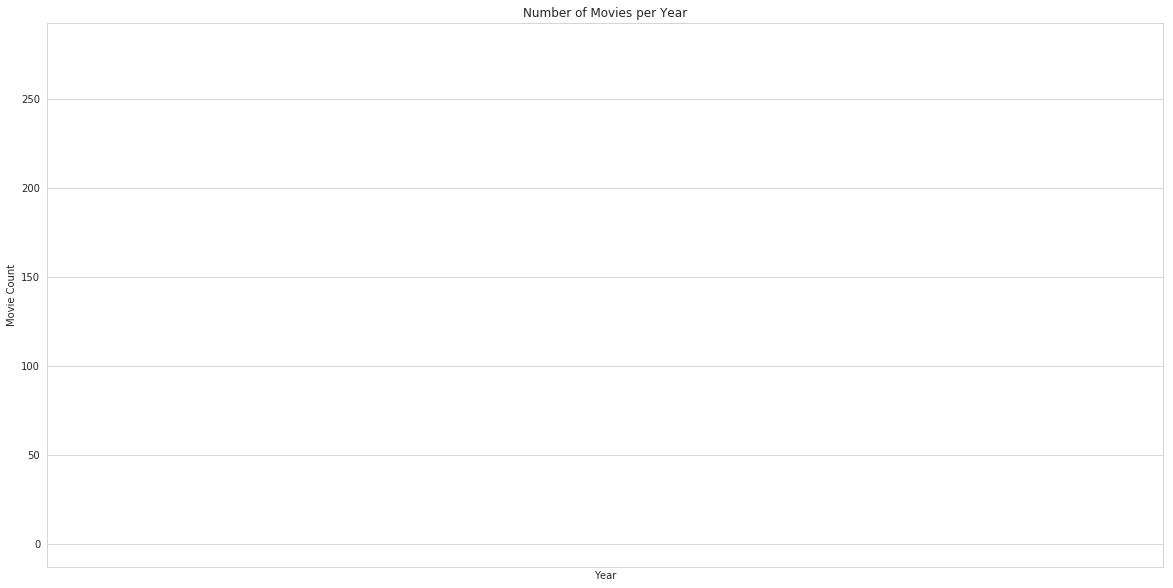

In [66]:
plt.figure(figsize=(20,10))
plt.plot(movies_df.groupby(['year']).count()['title'])
plt.xticks(rotation=90)
plt.xlim(1910,2020)
plt.title("Number of Movies per Year")
plt.xlabel('Year')
plt.ylabel('Movie Count')

###### Whats the best way to feature engineer genres

Options:
    separate as genre_0, genre_1,.......
    separate as genre_X, genre_y,.......    

In [78]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [7]:
#separate as genre_0, genre_1,.......
movies_df['genres'].str.split('|', expand=True).head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


This is what we get if we split to genre_0,genre_1,......
However, this is not a useful representation for analysis and modeling

In [77]:
#separate as genre_X, genre_y,.......   
movies_df.genres.str.get_dummies(sep='|').head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This is what we get when we do one hot encoding.

In [0]:
movies_df = pd.concat([movies_df.drop('genres', axis=1), movies_df.genres.str.get_dummies(sep='|')], axis=1) 

In [43]:
movies_df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing - ratings_df

###### How many unique users

In [10]:
ratings_df.userId.nunique()

61

###### How many unique movies were rated

In [11]:
ratings_df.movieId.nunique()

689

There were 9742 movies in the movies dataframe. Looks like we have atleast one rating for most movies.

###### Change dtype of Rating Timestamp

In [44]:
ratings_df['rating_timestamp']=pd.to_datetime(ratings_df['timestamp'], unit='s');
ratings_df.head()

,userId,movieId,rating,timestamp,rating_timestamp
0,1,31,2.5,1260759144,2009-12-14 02:52:24
1,1,1029,3.0,1260759179,2009-12-14 02:52:59
2,1,1061,3.0,1260759182,2009-12-14 02:53:02
3,1,1129,2.0,1260759185,2009-12-14 02:53:05
4,1,1172,4.0,1260759205,2009-12-14 02:53:25


###### Feature Engineering with Dates

In [0]:
ratings_df['rating_timestamp_month']=ratings_df['rating_timestamp'].dt.month
ratings_df['rating_timestamp_year']=ratings_df['rating_timestamp'].dt.year
ratings_df['rating_timestamp_week']=ratings_df['rating_timestamp'].dt.week
ratings_df['rating_timestamp_dayofweek']=ratings_df['rating_timestamp'].dt.weekday
ratings_df['rating_timestamp_hour']=ratings_df['rating_timestamp'].dt.hour

In [17]:
ratings_df.head()

,userId,movieId,tag,timestamp,rating_timestamp,rating_timestamp_month,rating_timestamp_year,rating_timestamp_week,rating_timestamp_dayofweek,rating_timestamp_hour
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30,1,2006,4,6,12
1,15,1955,dentist,1193435061,2007-10-26 21:44:21,10,2007,43,4,21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57,2,2007,5,6,3
3,15,32892,Russian,1170626366,2007-02-04 21:59:26,2,2007,5,6,21
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05,3,2006,9,4,13


###### Data Visualization based on derived fields.

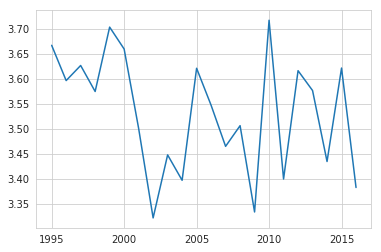

In [46]:
#Average rating by year
plt.plot(ratings_df.groupby(['rating_timestamp_year']).mean()['rating'])

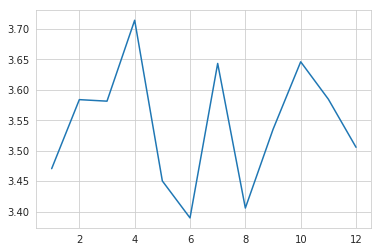

In [47]:
#Average rating by month
plt.plot(ratings_df.groupby(['rating_timestamp_month']).mean()['rating'])

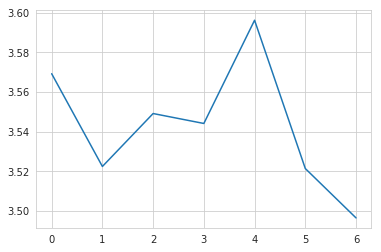

In [48]:
#Average rating by day of week
plt.plot(ratings_df.groupby(['rating_timestamp_dayofweek']).mean()['rating'])

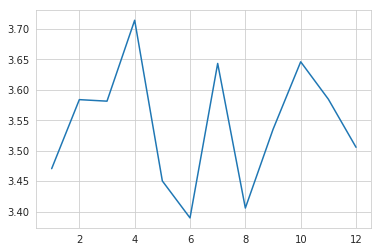

In [49]:
#Average rating by day of week
plt.plot(ratings_df.groupby(['rating_timestamp_month']).mean()['rating'])

### Data Preprocessing - tags_df

###### How many unique tags

In [57]:
tags_df.userId.nunique()
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
userId       1296 non-null int64
movieId      1296 non-null int64
tag          1296 non-null object
timestamp    1296 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.6+ KB


###### Which are the unique tags

In [58]:
tags_df.tag.unique()

array(["sandra 'boring' bullock", 'dentist', 'Cambodia', 'Russian',
       'forgettable', 'short', 'dull story', 'powerpoint', 'activist',
       'documentary', 'uganda', 'Ron Howard', 'music', 'weird',
       'Steve Martin', 'action', 'anime', 'kung fu', 'drama', 'indie',
       'love', 'b movie', 'comedt', 'horror',
       'Trilogy of the Imagination', 'Gilliam', 'Takashi Miike',
       'intense', 'r:violence', 'tarantino', 'parody', 'emotional',
       'tragedy', 'original plot', 'Predictable', 'CHRISTIAN', 'jesus',
       'bollywood', 'No progress', 'Too slow', 'Views', 'cult classic',
       'Science Fiction', 'cult film', 'jack nicholson', 'psychological',
       'Stanley Kubrick', 'genius', 'intellectual', 'mathematics',
       'psychology', 'Mindfuck', 'nonlinear', 'twist ending',
       'intelligent', 'math', 'Christopher Nolan', 'complicated',
       'Hugh Jackman', 'alternate reality', 'mindfuck', 'philosophy',
       'sci-fi', 'artificial intelligence', 'good science',
    

###### How many unique movies has tags

In [0]:
tags_df.movieId.nunique()

1572

###### Change dtype of Rating Timestamp

In [0]:
tags_df['tag_timestamp']=pd.to_datetime(tags_df['timestamp'], unit='s')

###### Feature Engineering with Dates

In [0]:
tags_df['tag_timestamp_month']=tags_df['tag_timestamp'].dt.month
tags_df['tag_timestamp_year']=tags_df['tag_timestamp'].dt.year
tags_df['tag_timestamp_week']=tags_df['tag_timestamp'].dt.week
tags_df['tag_timestamp_dayofweek']=tags_df['tag_timestamp'].dt.weekday
tags_df['tag_timestamp_hour']=tags_df['tag_timestamp'].dt.hour

###### Data Visualization based on derived fields.

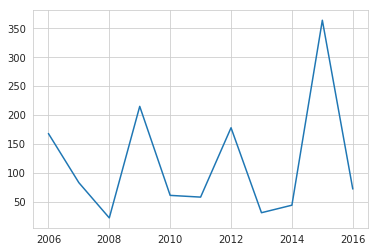

In [61]:
#Tag count by year
plt.plot(tags_df.groupby(['tag_timestamp_year']).count()['tag'])

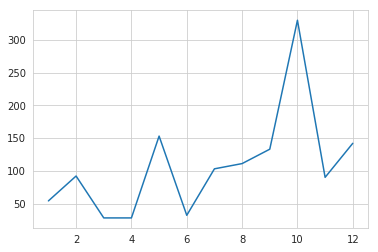

In [62]:
#Tag count by month
plt.plot(tags_df.groupby(['tag_timestamp_month']).count()['tag'])

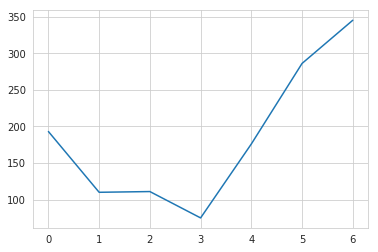

In [63]:
#Tag count by day of week
plt.plot(tags_df.groupby(['tag_timestamp_dayofweek']).count()['tag'])

###### Merge movies with ratings

In [0]:
movies_df['year']=pd.to_numeric(movies_df['year'])
movies_df=movies_df[(movies_df['year'] > 1915) & (movies_df['year'] < 2020)]
movieratings_df = pd.merge(movies_df, ratings_df)

In [68]:
movieratings_df.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,19,3.0,855190091


###### Top 10 movies by rating count

In [0]:
movieratings_df.groupby(['title']).count()['rating'].sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

###### Top movies by rating average = 5

In [0]:
grouped=movieratings_df.groupby(['title'])
grouped.filter(lambda x: x['rating'].mean() == 5)

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Western,userId,rating,timestamp,rating_timestamp,rating_timestamp_month,rating_timestamp_year,rating_timestamp_week,rating_timestamp_dayofweek,rating_timestamp_hour
2611,53,Lamerica (1994),1994.0,0,0,1,0,0,0,0,...,0,85,5.0,889468268,1998-03-09 18:31:08,3,1998,11,0,18
2612,53,Lamerica (1994),1994.0,0,0,1,0,0,0,0,...,0,603,5.0,963180003,2000-07-09 22:00:03,7,2000,27,6,22
3190,99,Heidi Fleiss: Hollywood Madam (1995),1995.0,0,0,0,0,0,0,0,...,0,191,5.0,829759809,1996-04-17 16:50:09,4,1996,16,2,16
3191,99,Heidi Fleiss: Hollywood Madam (1995),1995.0,0,0,0,0,0,0,0,...,0,603,5.0,954482070,2000-03-31 05:54:30,3,2000,13,4,5
4051,148,"Awfully Big Adventure, An (1995)",1995.0,0,0,0,0,0,0,0,...,0,191,5.0,829760897,1996-04-17 17:08:17,4,1996,16,2,17
12885,467,Live Nude Girls (1995),1995.0,0,0,0,0,0,1,0,...,0,492,5.0,863976567,1997-05-18 17:29:27,5,1997,20,6,17
13520,495,In the Realm of the Senses (Ai no corrida) (1976),1976.0,0,0,0,0,0,0,0,...,0,603,5.0,953927108,2000-03-24 19:45:08,3,2000,12,4,19
13521,496,What Happened Was... (1994),1994.0,0,0,0,0,0,1,0,...,0,191,5.0,829760898,1996-04-17 17:08:18,4,1996,16,2,17
17255,626,"Thin Line Between Love and Hate, A (1996)",1996.0,0,0,0,0,0,1,0,...,0,544,5.0,850688776,1996-12-15 22:26:16,12,1996,50,6,22
17309,633,Denise Calls Up (1995),1995.0,0,0,0,0,0,1,0,...,0,555,5.0,978746353,2001-01-06 01:59:13,1,2001,1,5,1


###### Average Ratings of movies made by year

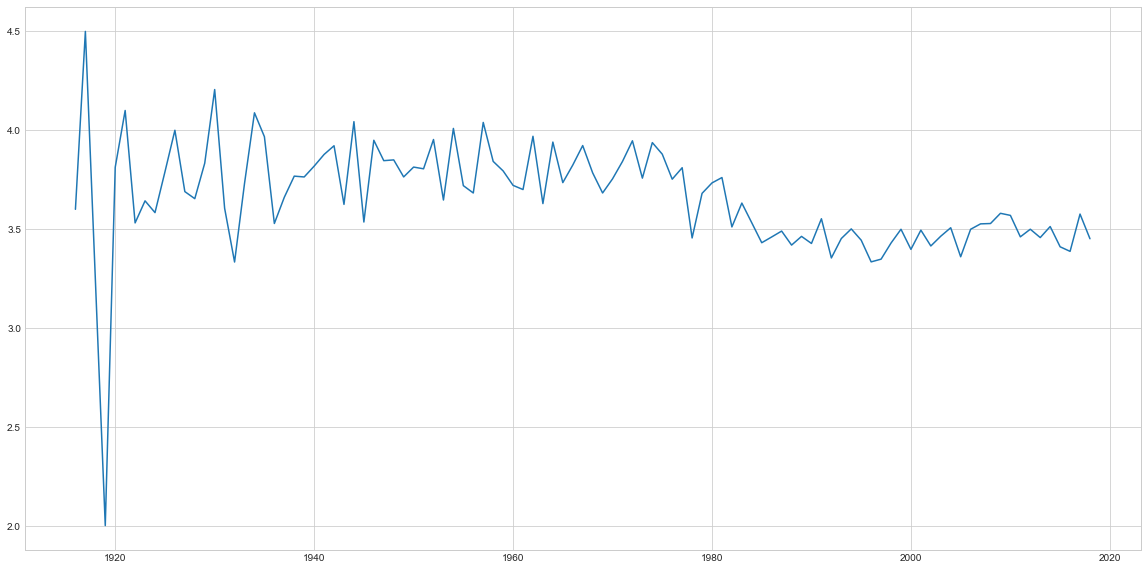

In [0]:
plt.figure(figsize=(20,10))
plt.plot(movieratings_df.groupby(['year']).mean()['rating'])

###### Average Rating by Movie

In [0]:
movies_df

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),1995.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),1995.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),1995.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),1995.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),1995.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
avg_rating_df=pd.DataFrame(ratings_df.groupby(['movieId']).mean()['rating'].reset_index())
movie_avg_rating_df=pd.merge(movies_df,avg_rating_df)

In [76]:
movie_avg_rating_df.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.267857


###### Tags by Rating

In [0]:
tag_avg_rating_df=pd.merge(tags_df,avg_rating_df)

In [81]:
tag_avg_rating_df.head()

,userId,movieId,tag,timestamp,tag_timestamp,tag_timestamp_month,tag_timestamp_year,tag_timestamp_week,tag_timestamp_dayofweek,tag_timestamp_hour,rating
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30,1,2006,4,6,12,3.440594
1,15,1955,dentist,1193435061,2007-10-26 21:44:21,10,2007,43,4,21,3.838710
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57,2,2007,5,6,3,4.000000
3,15,32892,Russian,1170626366,2007-02-04 21:59:26,2,2007,5,6,21,4.000000
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05,3,2006,9,4,13,3.547619


In [82]:
tag_avg_rating_df.groupby(['tag']).mean()['rating'].sort_values(ascending=False).head(10)

tag
beautiful scenery        5.000000
magical realism          5.000000
Alex van Warmerdam       5.000000
Fernando E. Solanas      5.000000
whimsical                4.548000
toplist16                4.500000
guy ritchie              4.500000
wrongful imprisonment    4.487138
Tim Robbins              4.487138
prison escape            4.487138
Name: rating, dtype: float64

In [74]:
tag_avg_rating_df.groupby(['tag']).count()['movieId'].sort_values(ascending=False).head(10)

tag
Ei muista    29
toplist07    26
getdvd       21
toplist12    20
toplist11    20
toplist15    19
toplist08    19
toplist10    18
toplist09    18
toplist14    16
Name: movieId, dtype: int64